<a href="https://colab.research.google.com/github/saniagonsalves/DM_assignment_part1/blob/main/G_Sania_Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name- Sania Gonsalves

Assignment- Adaboost

Titanic Basic Solution using Adaboost

Dataset link- https://drive.google.com/drive/folders/1n0pDud7eFL2P5mXcbpBzswESQv_QgYrh?usp=sharing

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
train = pd.read_csv("/content/r_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test = pd.read_csv("/content/r_test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Combine train and test**

In [ ]:
all = pd.concat([train, test], sort = False)
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [ ]:
#Fill Missing numbers with median
all['Age'] = all['Age'].fillna(value=all['Age'].median())
all['Fare'] = all['Fare'].fillna(value=all['Fare'].median())

In [ ]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


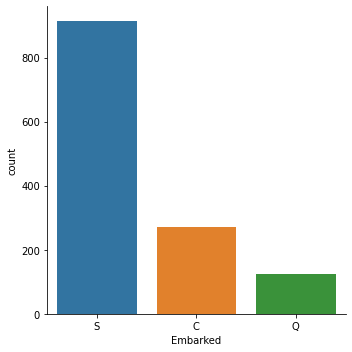

In [ ]:
sns.catplot(x = 'Embarked', kind = 'count', data = all) #or all['Embarked'].value_counts()

In [ ]:
all['Embarked'] = all['Embarked'].fillna('S')
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 172.9+ KB


In [ ]:
#Age
all.loc[ all['Age'] <= 16, 'Age'] = 0
all.loc[(all['Age'] > 16) & (all['Age'] <= 32), 'Age'] = 1
all.loc[(all['Age'] > 32) & (all['Age'] <= 48), 'Age'] = 2
all.loc[(all['Age'] > 48) & (all['Age'] <= 64), 'Age'] = 3
all.loc[ all['Age'] > 64, 'Age'] = 4 

In [ ]:
#Title
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+\.)', name)
    
    if title_search:
        return title_search.group(1)
    return ""

In [ ]:
all['Title'] = all['Name'].apply(get_title)
all['Title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Dr.            8
Rev.           8
Col.           4
Major.         2
Mlle.          2
Ms.            2
Capt.          1
Dona.          1
Don.           1
Countess.      1
Lady.          1
Mme.           1
Sir.           1
Jonkheer.      1
Name: Title, dtype: int64

In [ ]:
all['Title'] = all['Title'].replace(['Capt.', 'Dr.', 'Major.', 'Rev.'], 'Officer.')
all['Title'] = all['Title'].replace(['Lady.', 'Countess.', 'Don.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Royal.')
all['Title'] = all['Title'].replace(['Mlle.', 'Ms.'], 'Miss.')
all['Title'] = all['Title'].replace(['Mme.'], 'Mrs.')
all['Title'].value_counts()

Mr.         757
Miss.       264
Mrs.        198
Master.      61
Officer.     19
Royal.        6
Col.          4
Name: Title, dtype: int64

In [ ]:
#Cabin
all['Cabin'] = all['Cabin'].fillna('Missing')
all['Cabin'] = all['Cabin'].str[0]
all['Cabin'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [ ]:
#Family Size & Alone 
all['Family_Size'] = all['SibSp'] + all['Parch'] + 1
all['IsAlone'] = 0
all.loc[all['Family_Size']==1, 'IsAlone'] = 1
all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,M,S,Mr.,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C,C,Mrs.,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,M,S,Miss.,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C,S,Mrs.,2,0
4,5,0.0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,M,S,Mr.,1,1


In [ ]:
#Drop unwanted variables
all_1 = all.drop(['Name', 'Ticket'], axis = 1)
all_1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Family_Size,IsAlone
0,1,0.0,3,male,1.0,1,0,7.2500,M,S,Mr.,2,0
1,2,1.0,1,female,2.0,1,0,71.2833,C,C,Mrs.,2,0
2,3,1.0,3,female,1.0,0,0,7.9250,M,S,Miss.,1,1
3,4,1.0,1,female,2.0,1,0,53.1000,C,S,Mrs.,2,0
4,5,0.0,3,male,2.0,0,0,8.0500,M,S,Mr.,1,1


In [ ]:
all_dummies = pd.get_dummies(all_1, drop_first = True)
all_dummies.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,IsAlone,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T,Embarked_Q,Embarked_S,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Officer.,Title_Royal.
0,1,0.0,3,1.0,1,0,7.2500,2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1,2,1.0,1,2.0,1,0,71.2833,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1.0,3,1.0,0,0,7.9250,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
3,4,1.0,1,2.0,1,0,53.1000,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,5,0.0,3,2.0,0,0,8.0500,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0


In [ ]:
all_train = all_dummies[all_dummies['Survived'].notna()]
all_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    float64
 2   Pclass          891 non-null    int64  
 3   Age             891 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Fare            891 non-null    float64
 7   Family_Size     891 non-null    int64  
 8   IsAlone         891 non-null    int64  
 9   Sex_male        891 non-null    uint8  
 10  Cabin_B         891 non-null    uint8  
 11  Cabin_C         891 non-null    uint8  
 12  Cabin_D         891 non-null    uint8  
 13  Cabin_E         891 non-null    uint8  
 14  Cabin_F         891 non-null    uint8  
 15  Cabin_G         891 non-null    uint8  
 16  Cabin_M         891 non-null    uint8  
 17  Cabin_T         891 non-null    uin

In [ ]:
all_test = all_dummies[all_dummies['Survived'].isna()]
all_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     418 non-null    int64  
 1   Survived        0 non-null      float64
 2   Pclass          418 non-null    int64  
 3   Age             418 non-null    float64
 4   SibSp           418 non-null    int64  
 5   Parch           418 non-null    int64  
 6   Fare            418 non-null    float64
 7   Family_Size     418 non-null    int64  
 8   IsAlone         418 non-null    int64  
 9   Sex_male        418 non-null    uint8  
 10  Cabin_B         418 non-null    uint8  
 11  Cabin_C         418 non-null    uint8  
 12  Cabin_D         418 non-null    uint8  
 13  Cabin_E         418 non-null    uint8  
 14  Cabin_F         418 non-null    uint8  
 15  Cabin_G         418 non-null    uint8  
 16  Cabin_M         418 non-null    uint8  
 17  Cabin_T         418 non-null    uin

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_train.drop(['PassengerId','Survived'],axis=1), 
                                                    all_train['Survived'], test_size=0.30, 
                                                    random_state=101, stratify = all_train['Survived'])

**Build AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
ada = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100, random_state=0)
ada.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=0)

In [ ]:
predictions = ada.predict(X_test)

**Check Accuracy**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       165
         1.0       0.73      0.67      0.70       103

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.78      0.77       268



In [ ]:
print (f'Train Accuracy - : {ada.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {ada.score(X_test,y_test):.3f}')

Train Accuracy - : 0.961
Test Accuracy - : 0.776


**Final Predictions**

In [ ]:
TestForPred = all_test.drop(['PassengerId', 'Survived'], axis = 1)

In [ ]:
t_pred = ada.predict(TestForPred).astype(int)

In [ ]:
PassengerId = all_test['PassengerId']

In [ ]:
adaSub = pd.DataFrame({'PassengerId': PassengerId, 'Survived':t_pred })
adaSub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
adaSub.to_csv("1_Ada_Submission.csv", index = False)